# Presentation

L'objectif de ce notebook est de réaliser une analyse générale de la course Sainté Lyon 2024 dans une premier temps, puis de répondre dans un second temps à la question : `Sainté Lyon 2024 : partir prudemment permet-il de mieux performer ?`

- Input : race_result.csv
- Output : analyse servant de support à l'article de presse

In [16]:
VERBOSE = True

## 0. Imports

In [17]:
import sys
from pathlib import Path

# Definition du chemin vers notre code source local
sys.path.append(str(Path().resolve().parent))

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.definitions import CLEAN_DATA_PATH
from src.utils import seconds_to_time

## 1. Télécharger la donnée

In [19]:
race_results_df = pd.read_csv(CLEAN_DATA_PATH / "race_results.csv")

## 2. Analyse de base des résultats

Temps moyen des coureurs = 12h 1min 46s (6.73km/h)
Quantile 0.05 = 8h 51min 54s (9.14km/h)
Quantile 0.25 = 10h 43min 56s (7.55km/h)
Quantile 0.75 = 13h 16min 51s (6.1km/h)
Quantile 0.95 = 15h 26min 54s (5.24km/h)


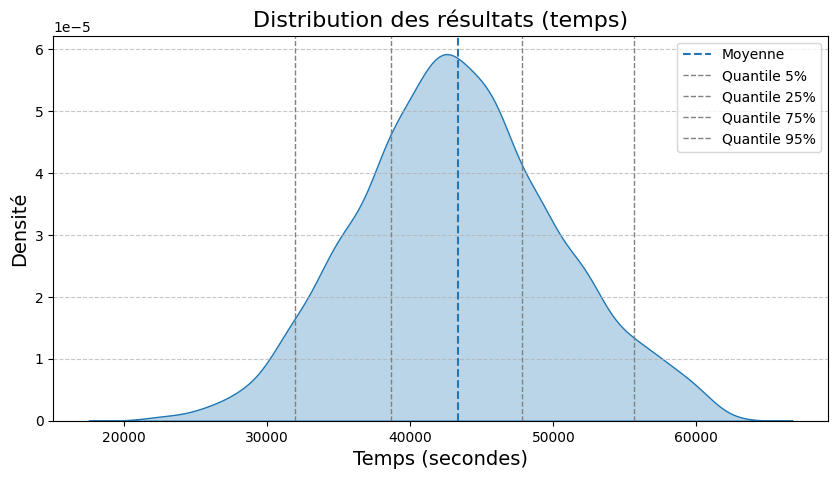

In [20]:
if VERBOSE:
    plt.figure(figsize=(10, 5))

    sns.kdeplot(data=race_results_df, x="temps", fill=True, common_norm=False, alpha=0.3, legend=True)

    mean = race_results_df["temps"].mean()
    temps = seconds_to_time(int(mean))
    print(f"Temps moyen des coureurs = {temps[0]}h {temps[1]}min {temps[2]}s ({round((81000/mean)*3.6, 2)}km/h)")
    plt.axvline(mean, linestyle="--", linewidth=1.5, label=f"Moyenne")

    # Calcul des quantiles
    quantiles = race_results_df["temps"].quantile([0.05, 0.25, 0.75, 0.95])
    for q, value in quantiles.items():
        temps = seconds_to_time(int(value))
        print(f"Quantile {q} = {temps[0]}h {temps[1]}min {temps[2]}s ({round((81000/value)*3.6, 2)}km/h)")
        plt.axvline(value, color="gray", linestyle="--", linewidth=1, label=f"Quantile {int(q*100)}%")

    plt.title("Distribution des résultats (temps)", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- La distribution des résultats suit une distribution normale, comme c'est souvent le cas en course à pied. Le temps d'arrivé moyen était de 12h 1min 46s, ce qui correspond à du 6.73 km/h.

- 5% des coureurs, sont arrivés en moins de 8h52 et 95% des coureurs sont arrivés en moins de 15h27.

- Environ la moitié des coureurs sont arrivés entre 10h45 et 13h45.

sexe
H    5561
F     701
Name: count, dtype: int64

Temps moyen pour les coureurs F = 12h 51min 47s
Temps moyen pour les coureurs H = 11h 55min 27s


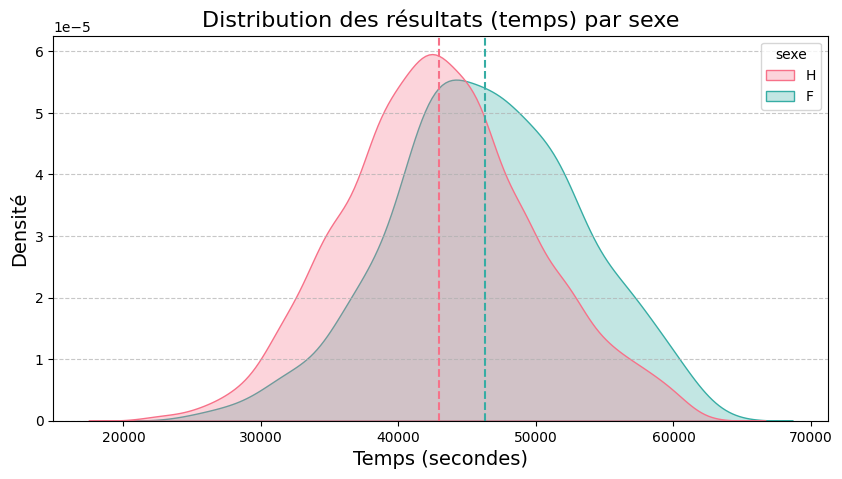

In [21]:
if VERBOSE:
    print(race_results_df["sexe"].value_counts())
    print()

    palette_dict = dict(zip(
        race_results_df["sexe"].unique(), 
        sns.color_palette("husl", len(race_results_df["sexe"].unique()))
    ))

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=race_results_df, x="temps", hue="sexe", fill=True, common_norm=False, alpha=0.3, legend=True, palette=palette_dict)

    category_means = race_results_df.groupby("sexe")["temps"].mean()
    for category, mean in category_means.items():
        temps = seconds_to_time(int(mean))
        print(f"Temps moyen pour les coureurs {category} = {temps[0]}h {temps[1]}min {temps[2]}s")
        plt.axvline(mean, color=palette_dict[category], linestyle="--", linewidth=1.5, label=f"Moyenne {category}")


    plt.title("Distribution des résultats (temps) par sexe", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [22]:
if VERBOSE:
    display(category_means)

sexe
F    46307.851641
H    42927.933106
Name: temps, dtype: float64

- Sans grande surprise, les hommes sont arrivés en moyenne 1h avant les femmes.

- Les distributions des deux catégories n'ont pas tout a fait les mêmes caractéristiques. En effet, la distribution des hommes est plus dense que celle des femmes au niveau des petits chronos, alors que celle des femmes est plus dense vers la fin du classement. Ceci pourrait s'expliquer par le fait qu'il y a une plus grande densité d'athlètes "compétitifs" chez les hommes que chez les femmes.

categorie
SE-M0H    3135
M1-M2H    1474
M3-M4H     717
SE-M0F     398
M1-M2F     200
M5-M6H     124
ES H       100
M3-M4F      87
M5-M6F      12
M7-M8H      11
ES F         4
Name: count, dtype: int64

Temps moyen pour les coureurs ES F = 13h 12min 56s
Temps moyen pour les coureurs ES H = 11h 30min 25s
Temps moyen pour les coureurs M1-M2F = 13h 5min 19s
Temps moyen pour les coureurs M1-M2H = 12h 9min 16s
Temps moyen pour les coureurs M3-M4F = 13h 49min 53s
Temps moyen pour les coureurs M3-M4H = 12h 44min 48s
Temps moyen pour les coureurs M5-M6F = 14h 8min 6s
Temps moyen pour les coureurs M5-M6H = 13h 19min 28s
Temps moyen pour les coureurs M7-M8H = 14h 20min 17s
Temps moyen pour les coureurs SE-M0F = 12h 29min 47s
Temps moyen pour les coureurs SE-M0H = 11h 34min 39s


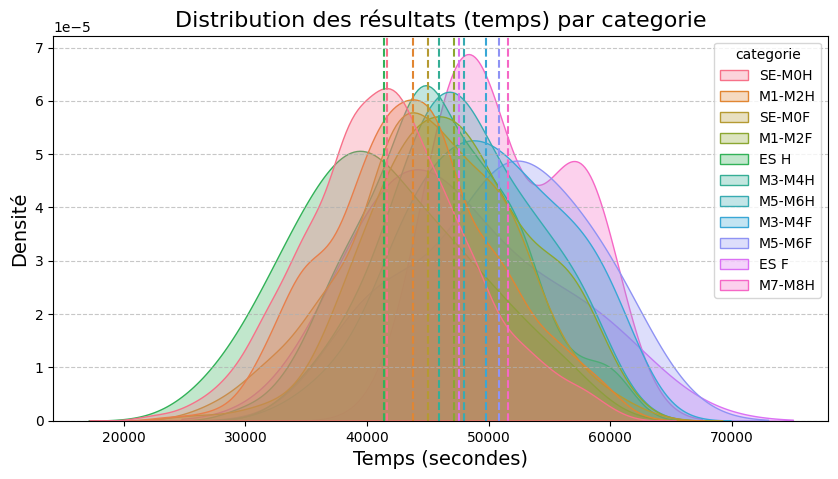

In [23]:
if VERBOSE:
    print(race_results_df["categorie"].value_counts())
    print()

    palette_dict = dict(zip(
        race_results_df["categorie"].unique(), 
        sns.color_palette("husl", len(race_results_df["categorie"].unique()))
    ))

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=race_results_df, x="temps", hue="categorie", fill=True, common_norm=False, alpha=0.3, legend=True, palette=palette_dict)

    category_means = race_results_df.groupby("categorie")["temps"].mean()
    for category, mean in category_means.items():
        temps = seconds_to_time(int(mean))
        print(f"Temps moyen pour les coureurs {category} = {temps[0]}h {temps[1]}min {temps[2]}s")
        plt.axvline(mean, color=palette_dict[category], linestyle="--", linewidth=1.5, label=f"Moyenne {category}")


    plt.title("Distribution des résultats (temps) par categorie", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- Les écarts entre catégories suivent globalement l'évolution de l'age : plus les athlètes sont jeunes, plus ils performent.
- Il est intéressant de remarquer que la catégorie avec la meilleure moyenne n'est pas celle des SE-M0, alors que l'on dit souvent que c'est l'age auquel on est le plus compétitif en ultra trail, mais plutôt les Espoirs (-23 ans). Ceci montre que les concurrents sont compétitifs de plus en plus tôt. Je suis d'ailleurs près à parier que ce n'était pas le cas il y a quelques années.

- Une catégorie sors du lot et semble avoir une distribution différente des autres (non normale) : les M7-M8H. En effet il semblerait qu'il y aurait deux "bosses", une première vers la moyenne et une seconde plus tard, comme s'il y avait deux types de profils de coureurs bien distincts au sein de la catégorie. Néanmoins, il n'y a que 11 points de donnée, ce qui est trop peu pour mener à une conclusion.

## 3. Valait-il mieux partir vite lors de la Sainté Lyon 2024 ?

Dans le précédent notebook l'explicabilité de la performance, principalement par les indexes, et de manière plus secondaire par la catégorie d'âge, la nationalité et l'année ont déjà été établis. Nous allons donc ici plutôt tenter d'expliquer la performance à postériori, c'est à dire en utilisant les données de la course elle même. 

En particulier, nous allons nous intéresser à l'impact des splits, définis dans le permier notebook, sur la performance.

In [24]:
# Encodage des variables de split en une seule colonne pour faciliter les plots
race_results_df["split_type"] = np.select(
    [
        race_results_df["negative_split"]==1,
        race_results_df["positive_split"]==1,
        race_results_df["equal_split"]==1,
], 
    [
        "negative",
        "positive",
        "equal"
    ], 
    default=None
)
race_results_df["large_split_type"] = np.select(
    [
        race_results_df["negative_split_large"]==1,
        race_results_df["positive_split_large"]==1,
        race_results_df["equal_split_large"]==1,
], 
    [
        "negative",
        "positive",
        "equal"
    ], 
    default=None
)

In [25]:
# Palette de couleur commune à tous les plots
split_palette_dict = dict(zip(
    ["negative", "positive", "equal"], 
    sns.color_palette("husl", len(race_results_df["split_type"].unique()))
))

### 3.1. Analyse générale

split_type
negative    2779
positive    2249
equal       1234
Name: count, dtype: int64

Temps moyen equal split = 11h 20min 56s
Temps moyen negative split = 11h 46min 29s
Temps moyen positive split = 12h 43min 3s


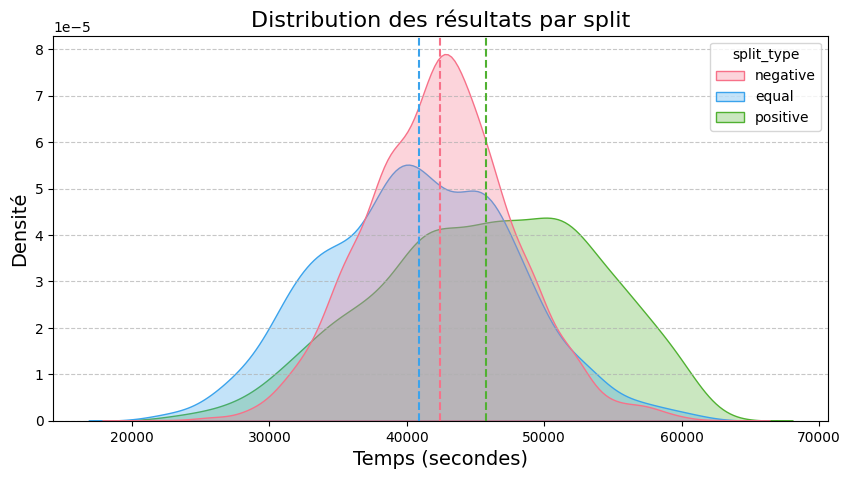

In [26]:
if VERBOSE:
    print(race_results_df["split_type"].value_counts())
    print()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=race_results_df, x="temps", hue="split_type", fill=True, common_norm=False, alpha=0.3, legend=True, palette=split_palette_dict)

    category_means = race_results_df.groupby("split_type")["temps"].mean()
    for category, mean in category_means.items():
        temps = seconds_to_time(int(mean))
        print(f"Temps moyen {category} split = {temps[0]}h {temps[1]}min {temps[2]}s")
        plt.axvline(mean, color=split_palette_dict[category], linestyle="--", linewidth=1.5, label=f"Moyenne {category}")


    plt.title("Distribution des résultats par split", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- Globalement, il semblerait que la stratégie la plus propice à la performance soit le lissage de l'effort sur la durée (l'equal split). Ceci fait sens puisque :
    - Partir trop fait perdre trop de temps sur la fin de course, par manque d'énergie par exemple.
    - Partir trop lentement est difficile à rattraper, d'autant plus qu'il n'est pas évident que l'on économise tant d'efforts que cela par rapport à un athlète qui court à son rythme.

- On remarque que la distribution des positive split est plus dense que les autres vers les hauts classements. Ceci pourrait s'expliquer par le fait que lorsqu'un athlète fait un positive split, il a plus de chance de relacher son effort, ou même de ne plus parvenir à bien avancer tout court. C'est l'effet des fameuses "explosions" que l'on voit là.

- Enfin, on voit que la distribution des split "equal" semble plus dense vers l'avant du classement. Ceci pourrait s'expliquer par le fait que les meilleurs athlètes gêrent en général mieux leur effort. En effet, ils sont souvent plus expérimntés et connaissent mieux leurs capacités.

large_split_type
equal       2813
negative    1903
positive    1546
Name: count, dtype: int64

Temps moyen equal split = 11h 32min 3s
Temps moyen negative split = 11h 51min 7s
Temps moyen positive split = 13h 8min 55s


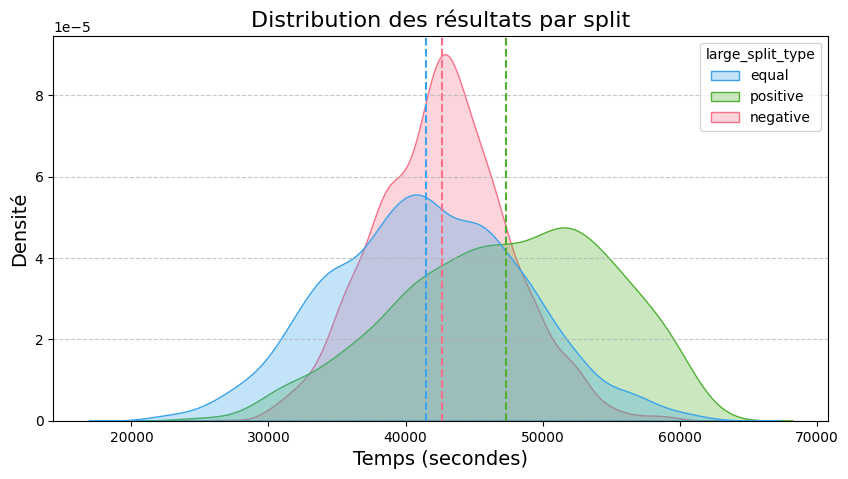

In [27]:
if VERBOSE:
    print(race_results_df["large_split_type"].value_counts())
    print()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=race_results_df, x="temps", hue="large_split_type", fill=True, common_norm=False, alpha=0.3, legend=True, palette=split_palette_dict)

    category_means = race_results_df.groupby("large_split_type")["temps"].mean()
    for category, mean in category_means.items():
        temps = seconds_to_time(int(mean))
        print(f"Temps moyen {category} split = {temps[0]}h {temps[1]}min {temps[2]}s")
        plt.axvline(mean, color=split_palette_dict[category], linestyle="--", linewidth=1.5, label=f"Moyenne {category}")


    plt.title("Distribution des résultats par split", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- On observe exactement les mêmes phénomènes pour le split "large" que pour le split classique. Ils sont même amplifiés, ce qui fait sens au vu des explications données précédemment, car la différence entre la définition classique et large est que les athlètes prochent du split égual sont catégorisés comme tels dans la définition large. Ceci ne fait donc qu'amplifier l'impact des "explosions" pour les positive splits et ajoute des athlètes qui ont bien gérés leur effort dans le haut du tableau à la catégorie "equal".

### 3.2. Y a-t-il une différence entre les femmes et les hommes ?

split_type
negative    2400
positive    2030
equal       1131
Name: count, dtype: int64

Temps moyen des H avec un equal split = 11h 16min 59s
Temps moyen des H avec un negative split = 11h 40min 35s
Temps moyen des H avec un positive split = 12h 34min 29s


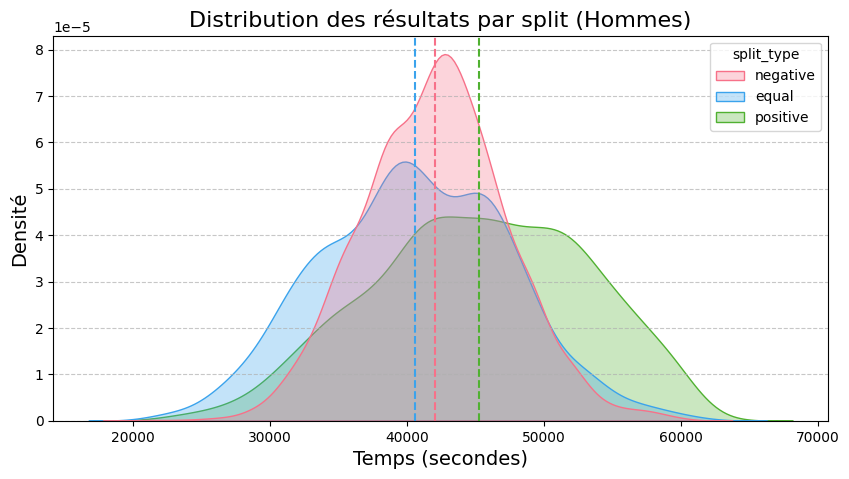

In [28]:
race_results_H_df = race_results_df[race_results_df["sexe"] == "H"]

if VERBOSE:
    print(race_results_H_df["split_type"].value_counts())
    print()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=race_results_H_df, x="temps", hue="split_type", fill=True, common_norm=False, alpha=0.3, legend=True, palette=split_palette_dict)

    category_means = race_results_H_df.groupby("split_type")["temps"].mean()
    for category, mean in category_means.items():
        temps = seconds_to_time(int(mean))
        print(f"Temps moyen des H avec un {category} split = {temps[0]}h {temps[1]}min {temps[2]}s")
        plt.axvline(mean, color=split_palette_dict[category], linestyle="--", linewidth=1.5, label=f"Moyenne {category}")


    plt.title("Distribution des résultats par split (Hommes)", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- La distribution des hommes possède les mêmes caractéristiques que celles du classement général, ce qui est logique puisqu'ils en repreésentent la majorité.

split_type
negative    379
positive    219
equal       103
Name: count, dtype: int64

Temps moyen des H avec un equal split = 12h 4min 24s
Temps moyen des H avec un negative split = 12h 23min 46s
Temps moyen des H avec un positive split = 14h 2min 33s


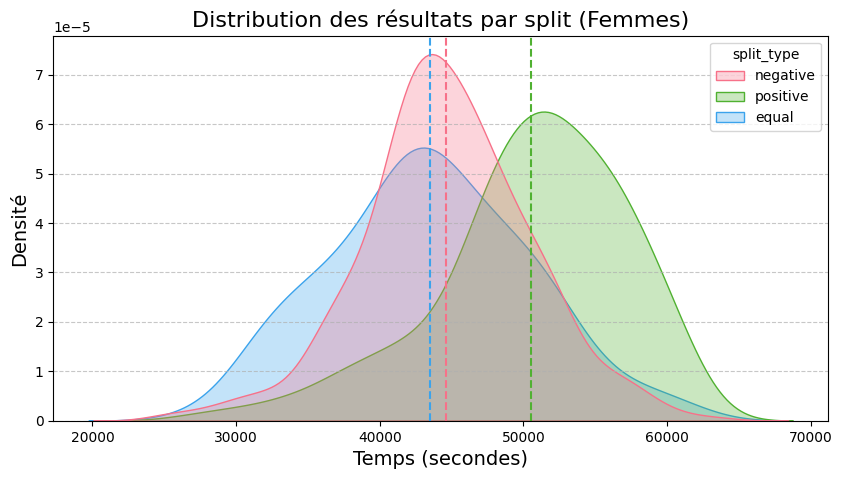

In [29]:
race_results_H_df = race_results_df[race_results_df["sexe"] == "F"]

if VERBOSE:
    print(race_results_H_df["split_type"].value_counts())
    print()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=race_results_H_df, x="temps", hue="split_type", fill=True, common_norm=False, alpha=0.3, legend=True, palette=split_palette_dict)

    category_means = race_results_H_df.groupby("split_type")["temps"].mean()
    for category, mean in category_means.items():
        temps = seconds_to_time(int(mean))
        print(f"Temps moyen des H avec un {category} split = {temps[0]}h {temps[1]}min {temps[2]}s")
        plt.axvline(mean, color=split_palette_dict[category], linestyle="--", linewidth=1.5, label=f"Moyenne {category}")


    plt.title("Distribution des résultats par split (Femmes)", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- Les distributions des femmes néanmoins ne sont pas tout à fait les mêmes.

- En particulier, la distribution des positive split est décallée plus vers l'arrière des classement. Ceci suggère que le fait de faire un positive split est plus pénalisant encore lorsqu'on est une femme que lorsqu'on est un homme.

### 3.3. Zoom sur les athlètes elites

Je définis les athlètes élites comme étant ceux qui ont terminés aux 100 permières positions.

split_type
equal       45
positive    36
negative    15
Name: count, dtype: int64

Temps moyen equal split = 7h 22min 46s
Temps moyen negative split = 7h 23min 59s
Temps moyen positive split = 7h 18min 31s


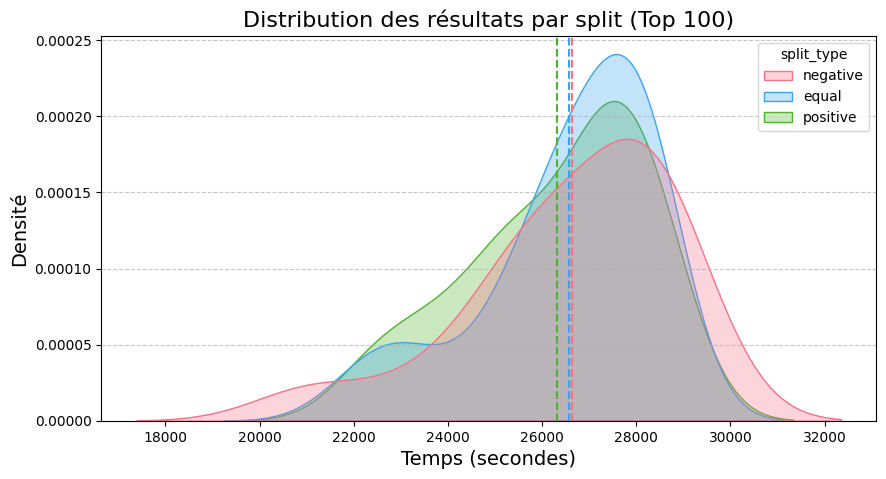

In [30]:
race_results_elite_df = race_results_df[race_results_df["classement"] <= 100]

if VERBOSE:
    print(race_results_elite_df["split_type"].value_counts())
    print()

    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=race_results_elite_df, x="temps", hue="split_type", fill=True, common_norm=False, alpha=0.3, legend=True, palette=split_palette_dict)

    category_means = race_results_elite_df.groupby("split_type")["temps"].mean()
    for category, mean in category_means.items():
        temps = seconds_to_time(int(mean))
        print(f"Temps moyen {category} split = {temps[0]}h {temps[1]}min {temps[2]}s")
        plt.axvline(mean, color=split_palette_dict[category], linestyle="--", linewidth=1.5, label=f"Moyenne {category}")


    plt.title("Distribution des résultats par split (Top 100)", fontsize=16)
    plt.xlabel("Temps (secondes)", fontsize=14)
    plt.ylabel("Densité", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- Si on observe les résultats des athlètes du top 100 en fonction de leur stratégie de course, on constate que cette dernière n’a presque pas d’impact en moyenne. Mais ici, il faut faire attention aux conclusions hâtives.  En effet, lorsqu'on y regarde de plus près, on constate que la distribution des negative splits est plus plate, et donc plus dense à l'avant et à l'arrière de ces 100 premières positions: comment l'expliquer ?

- Tout d'abord, il faut avoir en tête que chez les élites, l'objectif n'est pas forcément d'être finisher. Ainsi, certains athlètes qui partent trop vite (et seraient donc catégorisés en positive split), abandonnent la course. Si ces athlètes apparaissaient sur le graphique, on constaterait plus franchement que le positive split mène à une moins bonne performance.
 
- Ensuite, on peut expliquer l'avantage du negative split pour les athlètes de tête par deux facteurs principaux. Premièrement, jouer les places de tête peut galvaniser en fin de course, et donc faire accélérer l'athlète (proportionnellement aux autres). Deuxièmement, lorsque l'on joue la gagne sur une course connue comme la Saintélyon, tout le monde part relativement rapidement, car comme on l'a montré précédemment, rattraper beaucoup de places en seconde moitié de course n'est pas évident. Ainsi, les places d'honneur sur ce genre de course se jouent souvent au "qui va craquer le premier", ce qui implique que les athlètes du top sont ceux qui n'ont pas craqué et qui ont donc réussi à finir fort. Pour le dire plus simplement : on ne gagne pas une course comme la Saintélyon si on ne parvient pas à se détacher en deuxième moitié de course.


# END OF NOTEBOOK